In [43]:
import sys
import os
import glob
import numpy as np 
import matplotlib.pyplot as plt
from itertools import combinations

In [16]:
def rms_dict(x_ref, x_pred):
    x_ref = np.array(x_ref)
    x_pred = np.array(x_pred)
    if np.shape(x_pred) != np.shape(x_ref):
        raise ValueError('WARNING: not matching shapes in rms')
    error_2 = (x_ref - x_pred) ** 2
    average = np.sqrt(np.average(error_2))
    std_ = np.sqrt(np.var(error_2))
    return {'rmse': average, 'std': std_}

In [47]:
train_list = ['S37c-pearl','S7-domino','S7c','S19-domino','S49-domino','S49-pearl']
test_list = ['S37c-pearl','S7-domino','S7-pearl','S7c','S19-domino','S19-pearl','S49-domino','S49-pearl']
E_f = 1.079171471620878 #eV
c_evJ = 1.60218e-19 #eV to Joule
c_A2m2 = 1.0e+20 # Å² to m²

S37c-pearl:0.097375
S7-domino:0.081875
S7c:0.12350000000000001
S19-domino:0.10537500000000001
S49-domino:0.0915
S49-pearl:0.081875


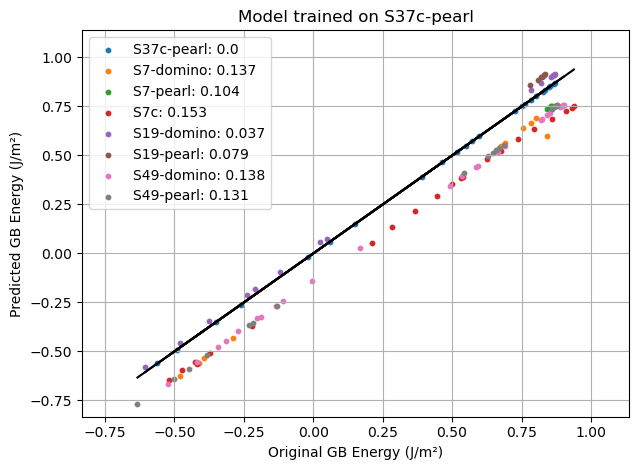

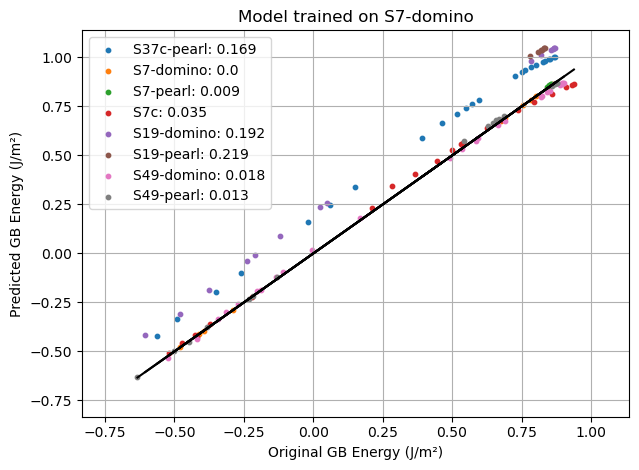

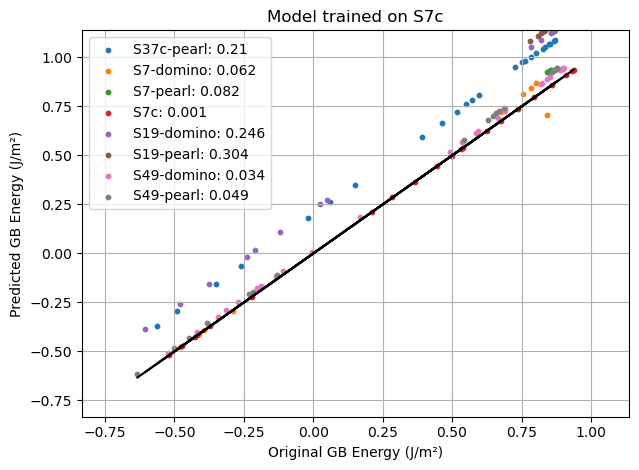

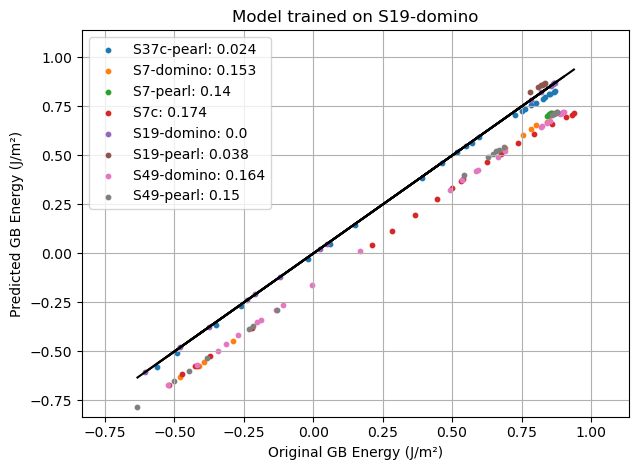

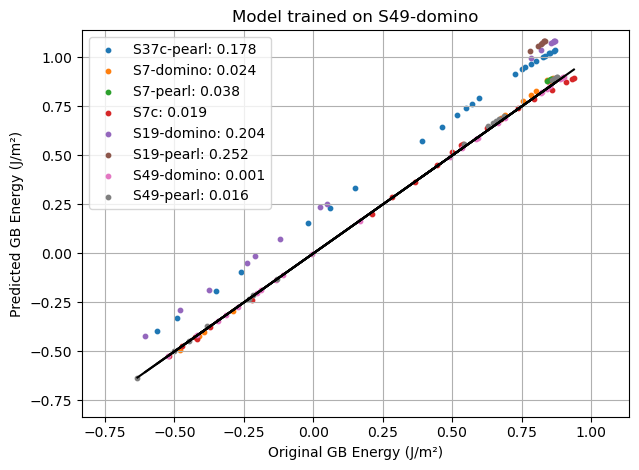

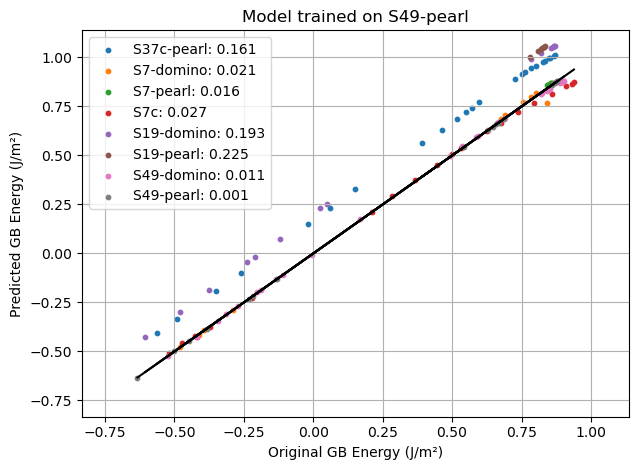

In [48]:
for train in train_list:
  plt.figure(dpi=100)
  plt.title(f'Model trained on {train}')
  plt.xlabel("Original GB Energy (J/m²)")
  plt.ylabel("Predicted GB Energy (J/m²)")
  plt.grid(True)
  plt.tight_layout() 
  xmin = float('inf')
  xmax = -float('inf')
  rmse_l = []
  for gb in test_list:
    data_file = f"./space_descriptors/{train}_{gb}_energy.dat" 
    data = np.loadtxt(data_file, dtype=str)
    dmu = [float(x) for x in data[:, 0][1:]]
    E_original = [float(x) for x in data[:, 2][1:]]
    E_predict = [float(x) for x in data[:, 3][1:]]
    N_Ag = [float(x) for x in data[:, 5][1:]]
    E_formation = [Ag * E_f * c_evJ * c_A2m2 for Ag in N_Ag]
    E_ori_mod = [a-b for a,b in zip(E_original, E_formation)]
    E_pre_mod = [a-b for a,b in zip(E_predict, E_formation)]
    rms = rms_dict(E_ori_mod, E_pre_mod)
    rmse = np.round(rms['rmse'],3)
    plt.scatter(E_ori_mod, E_pre_mod,
                label = f'{gb}: {rmse}', s=10)
    plt.plot(E_ori_mod, E_ori_mod, color='k')
    xmin = min(xmin, min(E_ori_mod))
    xmax = max(xmax, max(E_ori_mod))
    rmse_l.append(rmse)
    # for x,y,z in zip (E_original, E_predict, dmu):
      # plt.annotate(f"{int(z)}", (x,y), textcoords='offset points', 
      #              xytext=(0,-20), ha='center', fontsize=8)
  print(f'{train}:{sum(rmse_l)/len(rmse_l)}')
  plt.legend()
  plt.xlim(xmin-0.2, xmax+0.2)
  plt.ylim(xmin-0.2, xmax+0.2)

S37c-pearl:0.097375
S7-domino:0.081875
S7c:0.12350000000000001
S19-domino:0.10537500000000001
S49-domino:0.0915
S49-pearl:0.081875


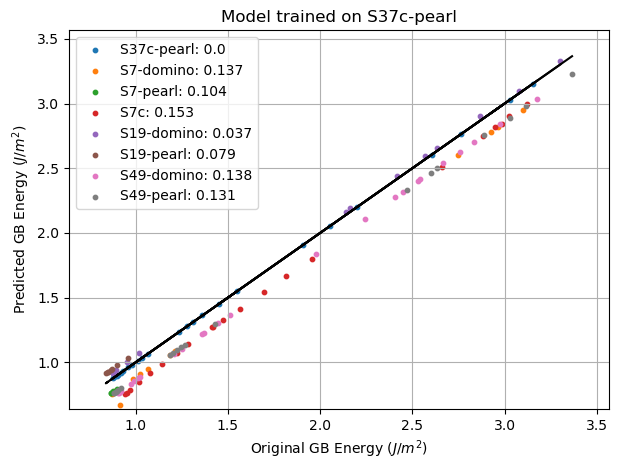

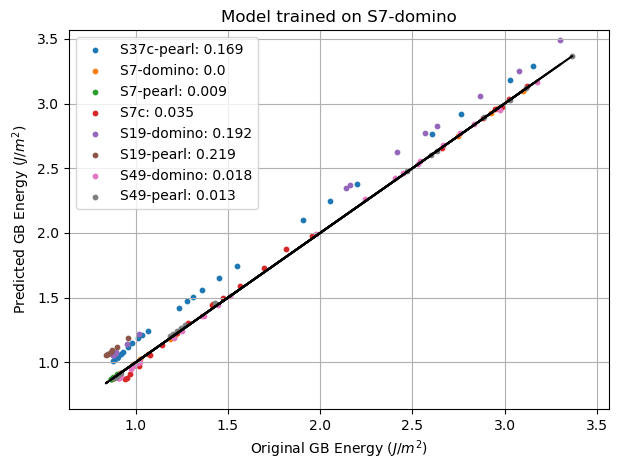

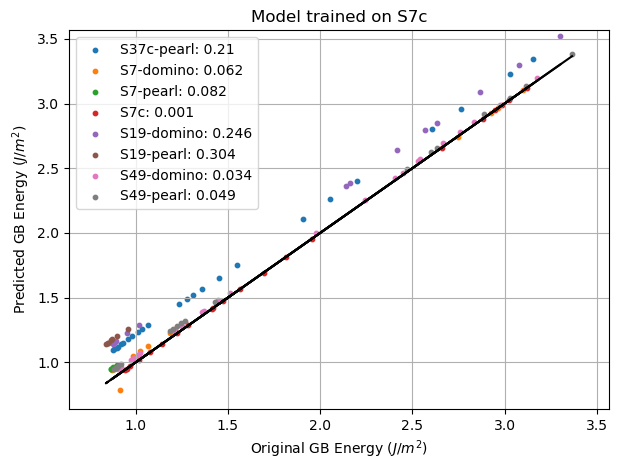

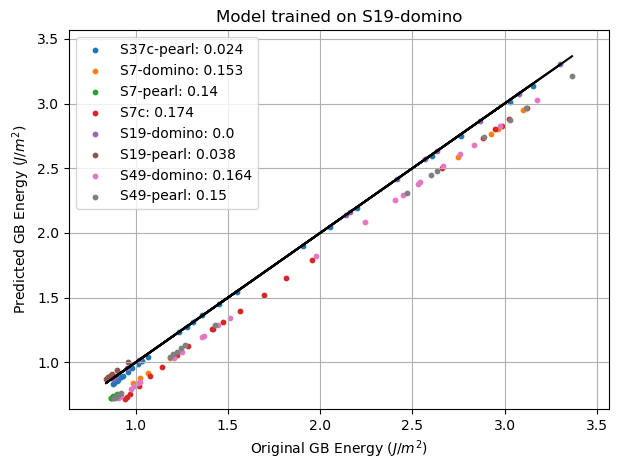

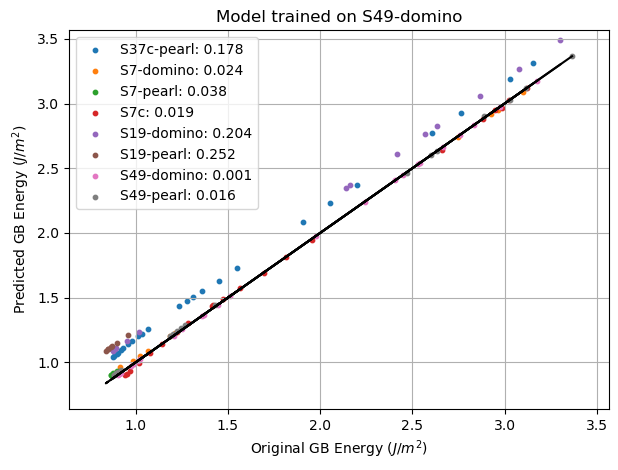

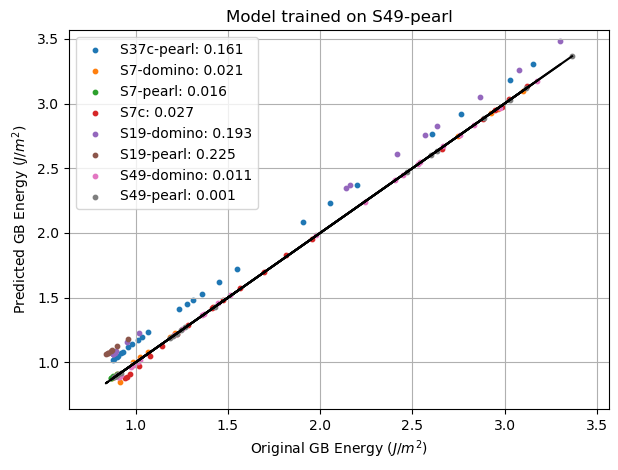

In [33]:
for train in train_list:
  plt.figure(dpi=100)
  plt.title(f'Model trained on {train}')
  unit = 'J/m^2'
  plt.xlabel(f"Original GB Energy (${unit}$)")
  plt.ylabel(f"Predicted GB Energy (${unit}$)")
  plt.grid(True)
  plt.tight_layout() 
  xmin = float('inf')
  xmax = -float('inf')
  rmse_l = []
  for gb in test_list:
    data_file = f"./space_descriptors/{train}_{gb}_energy.dat" 
    data = np.loadtxt(data_file, dtype=str)
    dmu = [float(x) for x in data[:, 0][1:]]
    E_original = [float(x) for x in data[:, 2][1:]]
    E_predict = [float(x) for x in data[:, 3][1:]]
    N_Ag = [float(x) for x in data[:, 5][1:]]
    E_formation = [Ag * c_evJ * c_A2m2 for Ag in N_Ag]
    E_ori_mod = [a-b for a,b in zip(E_original, E_formation)]
    E_pre_mod = [a-b for a,b in zip(E_predict, E_formation)]
    rms = rms_dict(E_original, E_predict)
    rmse = np.round(rms['rmse'],3)
    plt.scatter(E_original, E_predict,
                label = f'{gb}: {rmse}', s=10)
    plt.plot(E_original, E_original, color='k')
    xmin = min(xmin, min(E_original))
    xmax = max(xmax, max(E_original))
    rmse_l.append(rmse)
    # for x,y,z in zip (E_original, E_predict, dmu):
      # plt.annotate(f"{int(z)}", (x,y), textcoords='offset points', 
      #              xytext=(0,-20), ha='center', fontsize=8)
  print(f'{train}:{sum(rmse_l)/len(rmse_l)}')
  plt.legend()
  plt.xlim(xmin-0.2, xmax+0.2)
  plt.ylim(xmin-0.2, xmax+0.2)

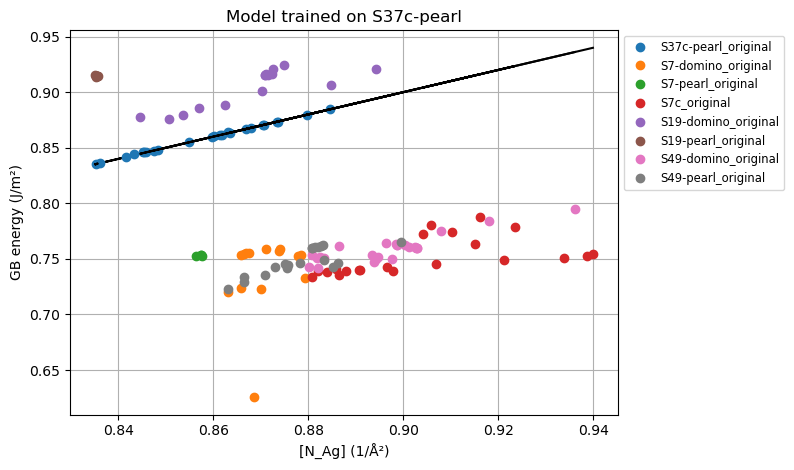

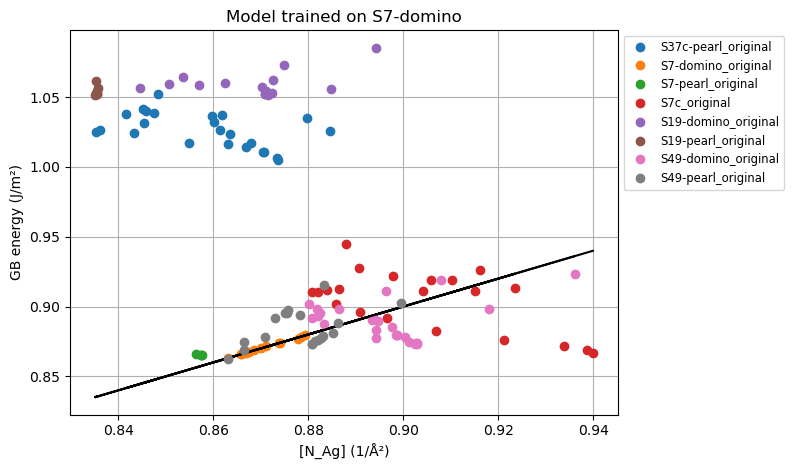

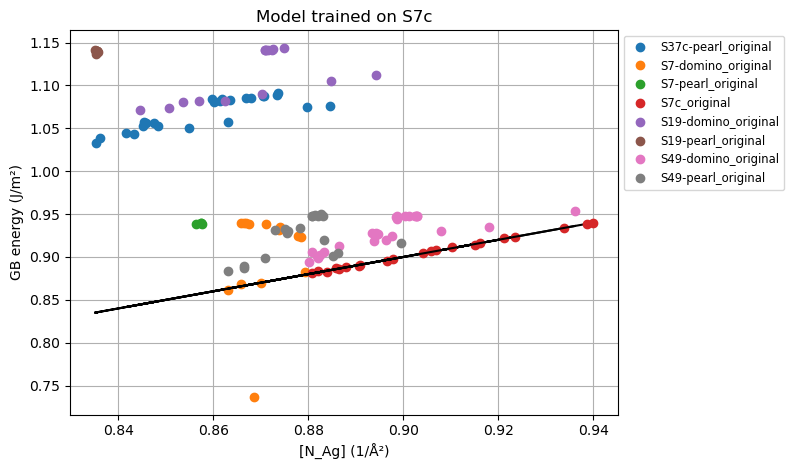

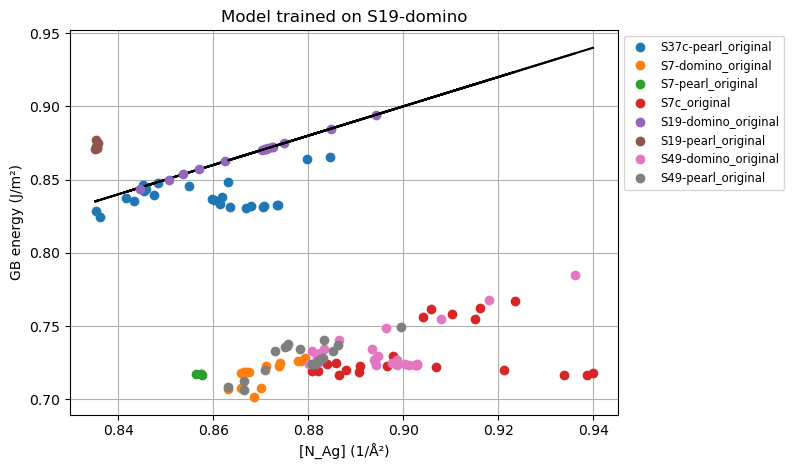

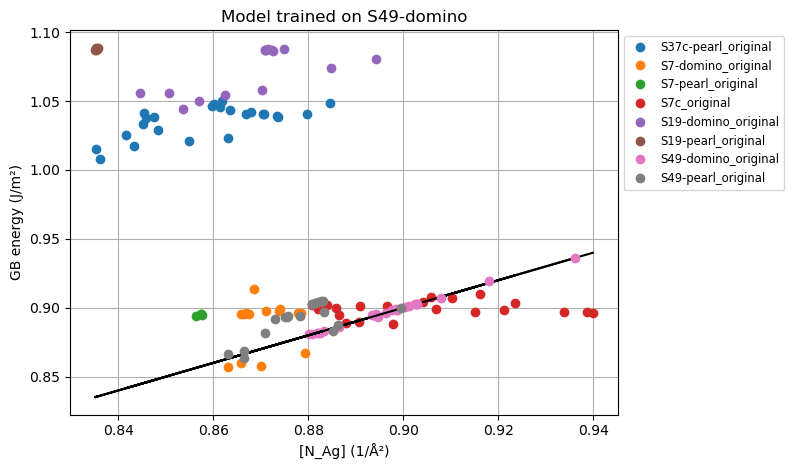

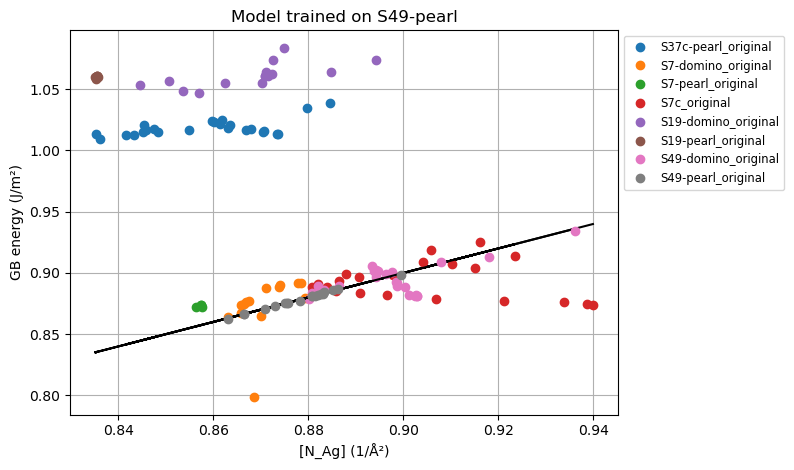

In [59]:
for train in train_list:
  plt.figure(dpi=100)
  plt.title(f'Model trained on {train}')
  plt.xlabel("[N_Ag] (1/Å²)")
  plt.ylabel("GB energy (J/m²)")
  plt.grid(True)
  plt.tight_layout() 
  xmin = float('inf')
  xmax = -float('inf')

  for gb in test_list:
    data_file = f"./space_descriptors/{train}_{gb}_energy.dat" 
    data = np.loadtxt(data_file, dtype=str)
    dmu = [float(x) for x in data[:, 0][1:]]
    
    E_original = [float(x) for x in data[:, 2][1:]]
    E_predict = [float(x) for x in data[:, 3][1:]]
    N_Ag = [float(x) for x in data[:, 5][1:]]
    
    f = np.poly1d(np.polyfit(N_Ag,E_original,1))
    E_formation = [Ag * f[1] for Ag in N_Ag]
    E_ori_mod = [a-b for a,b in zip(E_original, E_formation)]
    E_pre_mod = [a-b for a,b in zip(E_predict, E_formation)]
    
    plt.plot(E_ori_mod, E_ori_mod, color='black')
    plt.plot(E_ori_mod, E_pre_mod, #color='g',
             marker='o', linestyle='none',
             label=f"{gb}_original")
#     plt.plot(N_Ag, E_pre_mod, #color='g',
#              marker='o', linestyle='none',
#              label=f"{gb}_predict:{f}")
    
  plt.legend(loc='upper left', fontsize='small', bbox_to_anchor=(1,1))


('S37c-pearl', 'S7-domino'):0.100625
('S37c-pearl', 'S7c'):0.24575
('S37c-pearl', 'S19-domino'):0.0975
('S37c-pearl', 'S49-domino'):0.083
('S37c-pearl', 'S49-pearl'):0.12087500000000001
('S7-domino', 'S7c'):0.10787500000000001
('S7-domino', 'S19-domino'):0.15862500000000002
('S7-domino', 'S49-domino'):0.077
('S7-domino', 'S49-pearl'):0.07875
('S7c', 'S19-domino'):0.1875
('S7c', 'S49-domino'):0.11587499999999999
('S7c', 'S49-pearl'):0.1135
('S19-domino', 'S49-domino'):0.13075
('S19-domino', 'S49-pearl'):0.16887499999999997
('S49-domino', 'S49-pearl'):0.084625


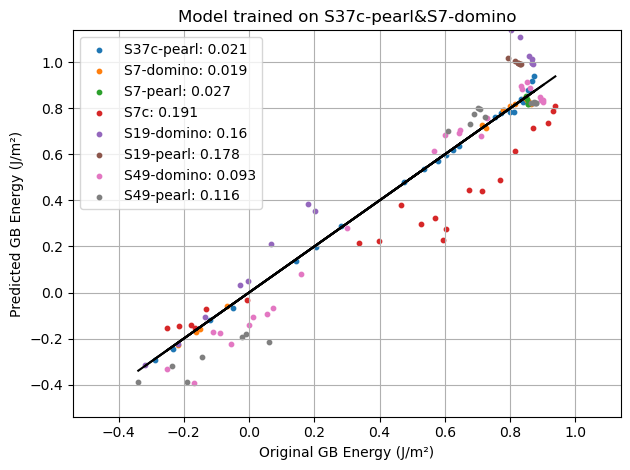

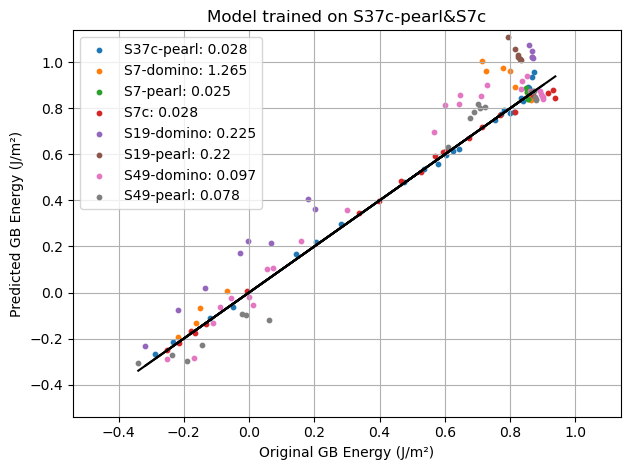

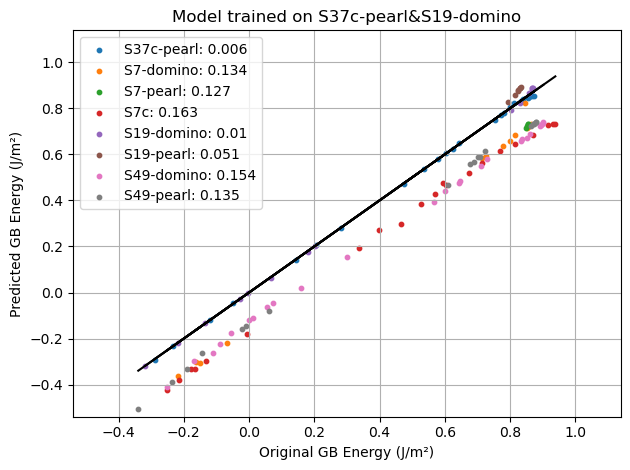

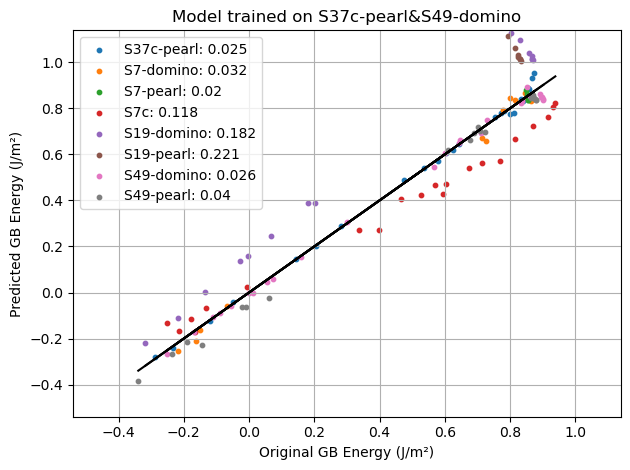

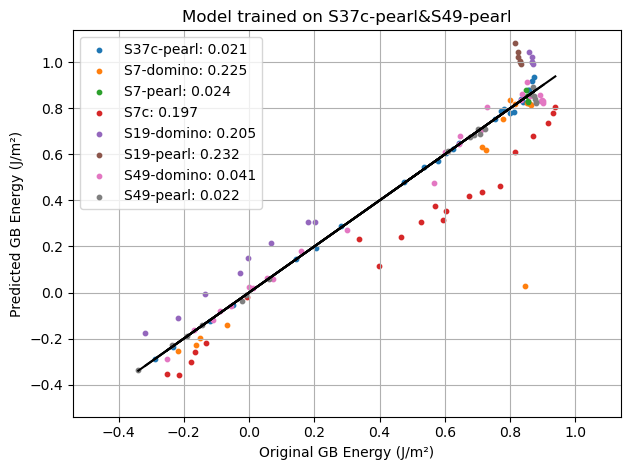

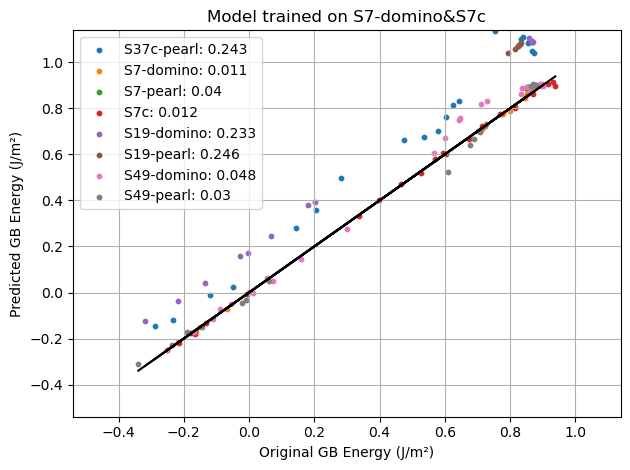

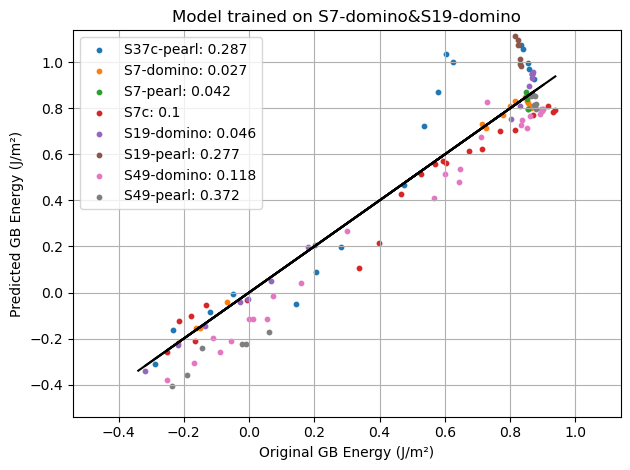

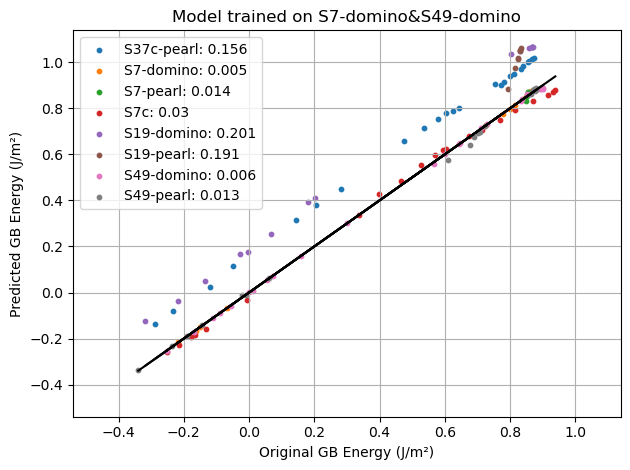

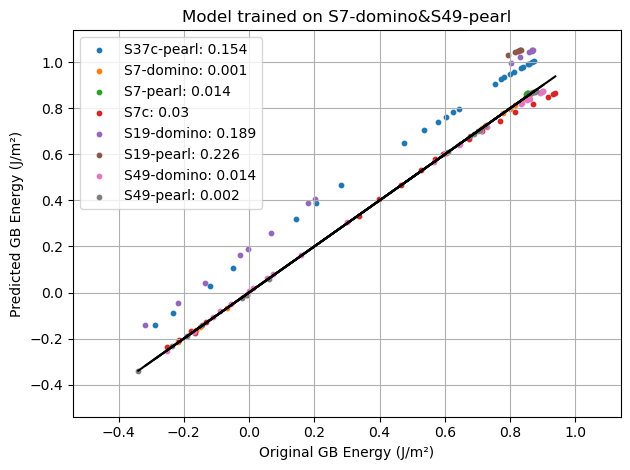

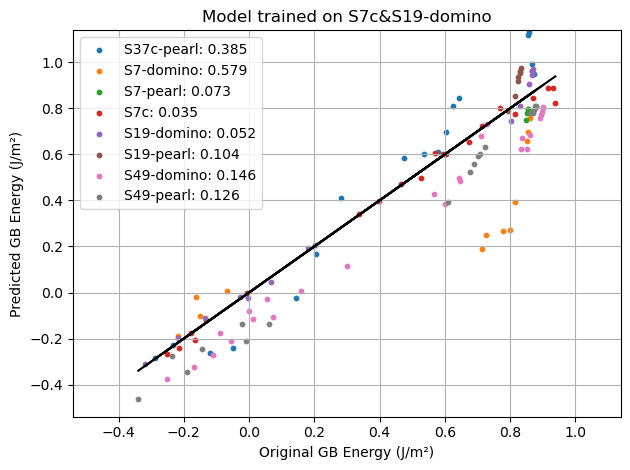

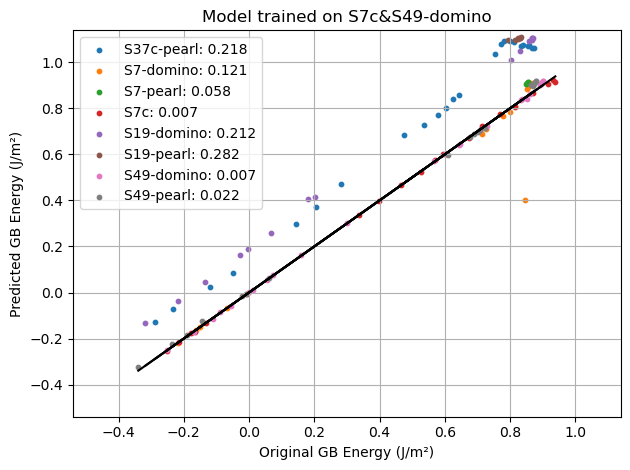

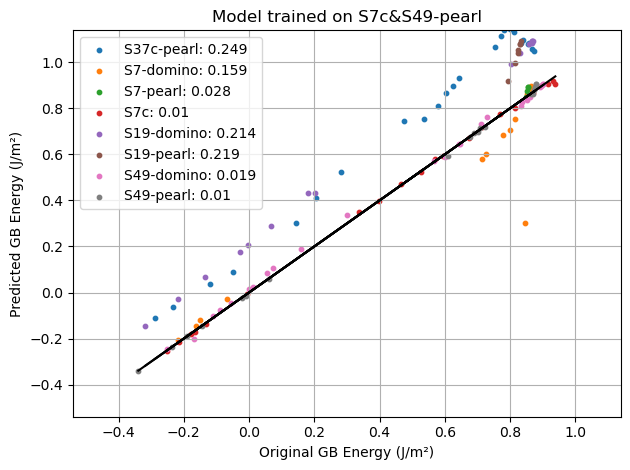

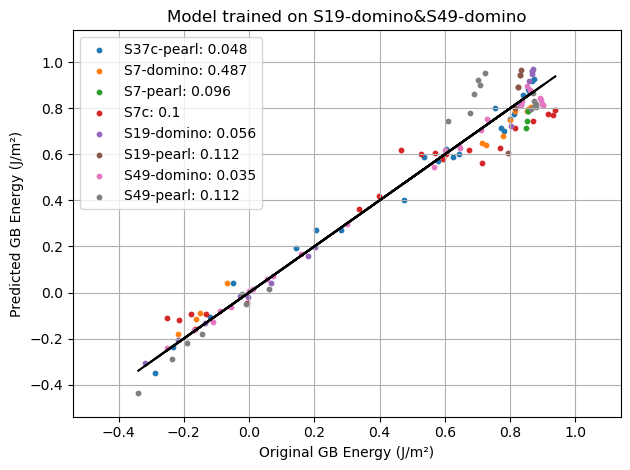

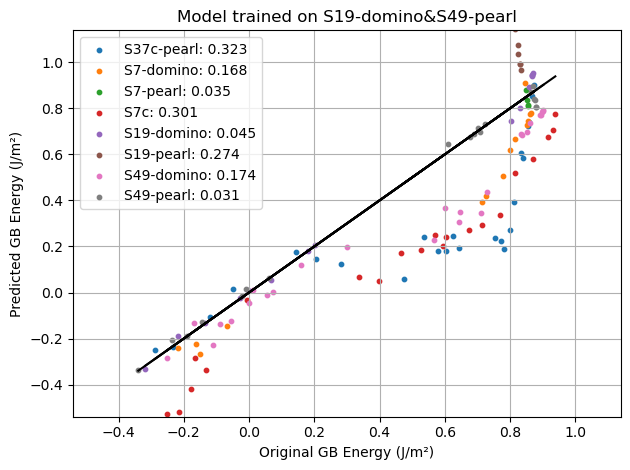

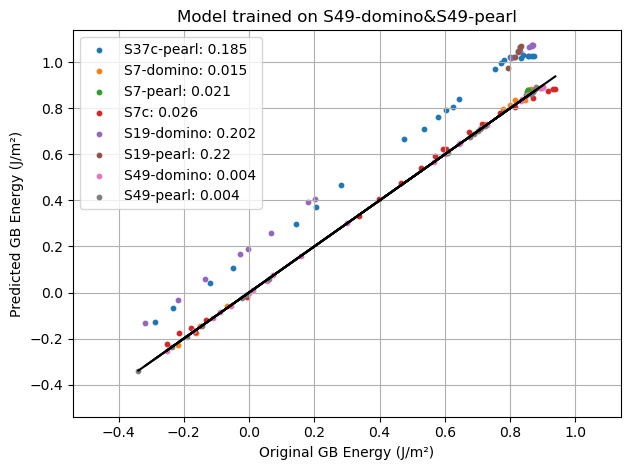

In [44]:
des_list = ['S37c-pearl','S7-domino','S7c','S19-domino','S49-domino','S49-pearl']
train_list = list(combinations(des_list, 2))
test_list = ['S37c-pearl','S7-domino','S7-pearl','S7c','S19-domino','S19-pearl','S49-domino','S49-pearl']
E_f = 1.079171471620878 #eV
c_evJ = 1.60218e-19 #eV to Joule
c_A2m2 = 1.0e+20 # Å² to m²
for train in train_list:
  plt.figure(dpi=100)
  plt.title(f'Model trained on {train[0]}&{train[1]}')
  plt.xlabel("Original GB Energy (J/m²)")
  plt.ylabel("Predicted GB Energy (J/m²)")
  plt.grid(True)
  plt.tight_layout() 
  xmin = float('inf')
  xmax = -float('inf')
  rmse_l = []
  for gb in test_list:
    data_file = f"./space_descriptors/{train[0]}&{train[1]}_{gb}_energy.dat" 
    data = np.loadtxt(data_file, dtype=str)
    dmu = [float(x) for x in data[:, 0][1:]]
    E_original = [float(x) for x in data[:, 2][1:]]
    E_predict = [float(x) for x in data[:, 3][1:]]
    N_Ag = [float(x) for x in data[:, 5][1:]]
    E_formation = [Ag * c_evJ * c_A2m2 for Ag in N_Ag]
    E_ori_mod = [a-b for a,b in zip(E_original, E_formation)]
    E_pre_mod = [a-b for a,b in zip(E_predict, E_formation)]
    rms = rms_dict(E_ori_mod, E_pre_mod)
    rmse = np.round(rms['rmse'],3)
    plt.scatter(E_ori_mod, E_pre_mod,
                label = f'{gb}: {rmse}', s=10)
    plt.plot(E_ori_mod, E_ori_mod, color='k')
    xmin = min(xmin, min(E_ori_mod))
    xmax = max(xmax, max(E_ori_mod))
    rmse_l.append(rmse)
    # for x,y,z in zip (E_original, E_predict, dmu):
      # plt.annotate(f"{int(z)}", (x,y), textcoords='offset points', 
      #              xytext=(0,-20), ha='center', fontsize=8)
  print(f'{train}:{sum(rmse_l)/len(rmse_l)}')
  plt.legend()
  plt.xlim(xmin-0.2, xmax+0.2)
  plt.ylim(xmin-0.2, xmax+0.2)

FileNotFoundError: ./space_descriptors/S37c-pearl&S7-domino&S7c_S37c-pearl_energy.dat not found.

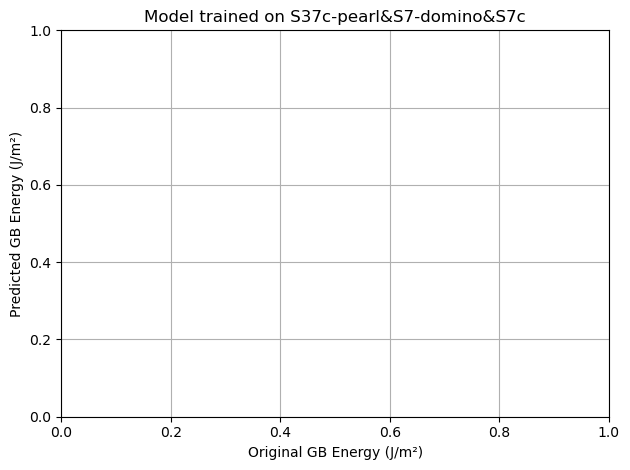

In [45]:
des_list = ['S37c-pearl','S7-domino','S7c','S19-domino','S49-domino','S49-pearl']
train_list = list(combinations(des_list, 3))
test_list = ['S37c-pearl','S7-domino','S7-pearl','S7c','S19-domino','S19-pearl','S49-domino','S49-pearl']
E_f = 1.079171471620878 #eV
c_evJ = 1.60218e-19 #eV to Joule
c_A2m2 = 1.0e+20 # Å² to m²
for train in train_list:
  plt.figure(dpi=100)
  plt.title(f'Model trained on {train[0]}&{train[1]}&{train[2]}')
  plt.xlabel("Original GB Energy (J/m²)")
  plt.ylabel("Predicted GB Energy (J/m²)")
  plt.grid(True)
  plt.tight_layout() 
  xmin = float('inf')
  xmax = -float('inf')
  rmse_l = []
  for gb in test_list:
    data_file = f"./space_descriptors/{train[0]}&{train[1]}&{train[2]}_{gb}_energy.dat" 
    data = np.loadtxt(data_file, dtype=str)
    dmu = [float(x) for x in data[:, 0][1:]]
    E_original = [float(x) for x in data[:, 2][1:]]
    E_predict = [float(x) for x in data[:, 3][1:]]
    N_Ag = [float(x) for x in data[:, 5][1:]]
    E_formation = [Ag * c_evJ * c_A2m2 for Ag in N_Ag]
    E_ori_mod = [a-b for a,b in zip(E_original, E_formation)]
    E_pre_mod = [a-b for a,b in zip(E_predict, E_formation)]
    rms = rms_dict(E_ori_mod, E_pre_mod)
    rmse = np.round(rms['rmse'],3)
    plt.scatter(E_ori_mod, E_pre_mod,
                label = f'{gb}: {rmse}', s=10)
    plt.plot(E_ori_mod, E_ori_mod, color='k')
    xmin = min(xmin, min(E_ori_mod))
    xmax = max(xmax, max(E_ori_mod))
    rmse_l.append(rmse)
    # for x,y,z in zip (E_original, E_predict, dmu):
      # plt.annotate(f"{int(z)}", (x,y), textcoords='offset points', 
      #              xytext=(0,-20), ha='center', fontsize=8)
  print(f'{train}:{sum(rmse_l)/len(rmse_l)}')
  plt.legend()
  plt.xlim(xmin-0.2, xmax+0.2)
  plt.ylim(xmin-0.2, xmax+0.2)